# Hypothesis Testing with scipy.stats

This notebook covers statistical hypothesis testing using both parametric and non-parametric methods:

**Parametric Tests** (assume specific distributions):
- **One-sample t-test**: Compare sample mean to a known value
- **Two-sample t-test**: Compare means of two groups
- **Paired t-test**: Compare means of paired observations
- **One-way ANOVA**: Compare means across multiple groups

**Non-Parametric Tests** (distribution-free):
- **Wilcoxon signed-rank test**: Non-parametric alternative to one-sample/paired t-test
- **Mann-Whitney U test**: Non-parametric alternative to two-sample t-test
- **Kruskal-Wallis test**: Non-parametric alternative to ANOVA
- **Chi-square test**: Test for independence in contingency tables

Examples use simulated data and Titanic dataset, exercises use the iris and tips datasets.

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.style.use('dark_background')
plt.rcParams['figure.facecolor'] = '#212121'
plt.rcParams['axes.facecolor'] = '#212121'
np.random.seed(42)

# Load datasets for exercises
iris = sns.load_dataset('iris')
tips = sns.load_dataset('tips')
titanic = sns.load_dataset('titanic')

print("Datasets loaded: iris, tips, titanic")

Datasets loaded: iris, tips, titanic


---
## 1. One-Sample t-test

**Purpose**: Test whether the population mean equals a hypothesized value.

**Hypotheses**:
- $H_0$: $\mu = \mu_0$ (population mean equals hypothesized value)
- $H_1$: $\mu \neq \mu_0$ (two-tailed), or $\mu > \mu_0$ / $\mu < \mu_0$ (one-tailed)

**Test statistic**:
$$t = \frac{\bar{x} - \mu_0}{s / \sqrt{n}}$$

**Assumptions**: Data are approximately normally distributed (robust for n > 30).

**Example**: Is the average fare on the Titanic different from $30?

In [46]:
# Example: One-sample t-test
# Test if Titanic average fare differs from $30

fares = titanic['fare'].dropna()
hypothesized_mean = 30

# Perform one-sample t-test
t_stat, p_value = stats.ttest_1samp(fares, hypothesized_mean)

print("One-Sample t-test: Is mean fare ≠ $30?")
print("=" * 50)
print(f"Sample mean: ${fares.mean():.2f}")
print(f"Hypothesized mean: ${hypothesized_mean}")
print(f"Sample size: {len(fares)}")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print("-" * 50)
if p_value < 0.05:
    print("Result: Reject H₀ (p < 0.05)")
    print("→ Mean fare is significantly different from $30")
else:
    print("Result: Fail to reject H₀ (p ≥ 0.05)")
    print("→ No significant evidence mean differs from $30")

One-Sample t-test: Is mean fare ≠ $30?
Sample mean: $32.20
Hypothesized mean: $30
Sample size: 891
t-statistic: 1.3240
p-value: 0.1858
--------------------------------------------------
Result: Fail to reject H₀ (p ≥ 0.05)
→ No significant evidence mean differs from $30


In [47]:
# Example: One-tailed test (alternative hypothesis)
# Test if average fare is GREATER than $30

t_stat, p_value_two = stats.ttest_1samp(fares, hypothesized_mean)
# For one-tailed (greater), divide p-value by 2 if t > 0
p_value_greater = p_value_two / 2 if t_stat > 0 else 1 - p_value_two / 2

print("One-Tailed t-test: Is mean fare > $30?")
print(f"p-value (one-tailed): {p_value_greater:.4f}")

# scipy 1.6+ supports alternative parameter
result = stats.ttest_1samp(fares, hypothesized_mean, alternative='greater')
print(f"Using alternative='greater': p = {result.pvalue:.4f}")

One-Tailed t-test: Is mean fare > $30?
p-value (one-tailed): 0.0929
Using alternative='greater': p = 0.0929


### Exercise 1: One-Sample t-test

Use the `iris` dataset.

**1.1** Test whether the average `sepal_length` across all species is equal to 5.8 cm. Report the t-statistic and p-value.

**1.2** Test whether the average `petal_width` is greater than 1.0 cm (one-tailed test).

**1.3** For the species 'setosa' only, test if the average `sepal_width` differs from 3.4 cm.

In [48]:
# Exercise 1.1: One-sample t-test for sepal_length vs 5.8
# YOUR CODE HERE


In [49]:
# Exercise 1.2: One-tailed test for petal_width > 1.0
# YOUR CODE HERE


In [50]:
# Exercise 1.3: One-sample t-test for setosa sepal_width vs 3.4
# YOUR CODE HERE


---
## 2. Two-Sample t-test (Independent Samples)

**Purpose**: Compare means of two independent groups.

**Hypotheses**:
- $H_0$: $\mu_1 = \mu_2$ (group means are equal)
- $H_1$: $\mu_1 \neq \mu_2$

**Variants**:
- `equal_var=True`: Student's t-test (assumes equal variances)
- `equal_var=False`: Welch's t-test (does not assume equal variances) — **recommended default**

**Example**: Do males and females pay different fares on the Titanic?

In [51]:
# Example: Two-sample t-test (independent groups)
# Compare fares between males and females

male_fares = titanic[titanic['sex'] == 'male']['fare'].dropna()
female_fares = titanic[titanic['sex'] == 'female']['fare'].dropna()

print("Two-Sample t-test: Male vs Female Fares")
print("=" * 50)
print(f"Males: n={len(male_fares)}, mean=${male_fares.mean():.2f}, std=${male_fares.std():.2f}")
print(f"Females: n={len(female_fares)}, mean=${female_fares.mean():.2f}, std=${female_fares.std():.2f}")
print("-" * 50)

# Welch's t-test (default, does not assume equal variances)
t_stat, p_value = stats.ttest_ind(male_fares, female_fares, equal_var=False)
print(f"Welch's t-test:")
print(f"  t-statistic: {t_stat:.4f}")
print(f"  p-value: {p_value:.4f}")

# Student's t-test (assumes equal variances)
t_stat_eq, p_value_eq = stats.ttest_ind(male_fares, female_fares, equal_var=True)
print(f"\nStudent's t-test (equal var):")
print(f"  t-statistic: {t_stat_eq:.4f}")
print(f"  p-value: {p_value_eq:.4f}")

Two-Sample t-test: Male vs Female Fares
Males: n=577, mean=$25.52, std=$43.14
Females: n=314, mean=$44.48, std=$58.00
--------------------------------------------------
Welch's t-test:
  t-statistic: -5.0775
  p-value: 0.0000

Student's t-test (equal var):
  t-statistic: -5.5291
  p-value: 0.0000


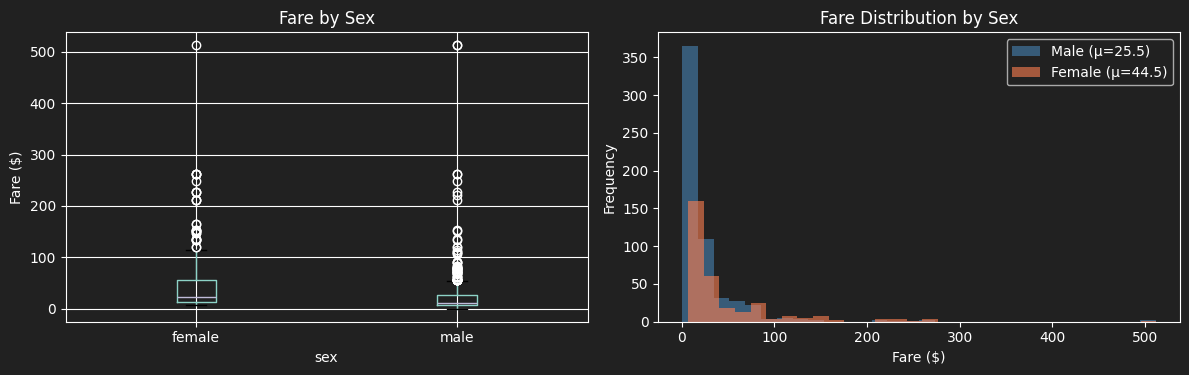

In [52]:
# Visualize the comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Boxplot
ax = axes[0]
titanic.boxplot(column='fare', by='sex', ax=ax)
ax.set_title('Fare by Sex')
ax.set_ylabel('Fare ($)')
plt.suptitle('')  # Remove automatic title

# Histogram
ax = axes[1]
ax.hist(male_fares, bins=30, alpha=0.6, label=f'Male (μ={male_fares.mean():.1f})', color='steelblue')
ax.hist(female_fares, bins=30, alpha=0.6, label=f'Female (μ={female_fares.mean():.1f})', color='coral')
ax.set_xlabel('Fare ($)')
ax.set_ylabel('Frequency')
ax.set_title('Fare Distribution by Sex')
ax.legend()

plt.tight_layout()
plt.show()

### Exercise 2: Two-Sample t-test

**2.1** Using the `tips` dataset, test whether smokers and non-smokers leave different tips. Use Welch's t-test.

**2.2** Using the `iris` dataset, compare the mean `petal_length` between 'setosa' and 'versicolor' species.

**2.3** Test if there's a difference in `total_bill` between lunch and dinner in the tips dataset.

In [53]:
# Exercise 2.1: Compare tips between smokers and non-smokers
# YOUR CODE HERE


In [54]:
# Exercise 2.2: Compare petal_length: setosa vs versicolor
# YOUR CODE HERE


In [55]:
# Exercise 2.3: Compare total_bill: lunch vs dinner
# YOUR CODE HERE


---
## 3. Paired t-test

**Purpose**: Compare means of two related measurements (same subjects measured twice).

**Hypotheses**:
- $H_0$: $\mu_d = 0$ (mean difference is zero)
- $H_1$: $\mu_d \neq 0$

**Use when**: Before/after measurements, matched pairs, repeated measures.

**Example**: Simulated before/after treatment data.

In [56]:
# Example: Paired t-test
# Simulated: Blood pressure before and after treatment

np.random.seed(42)
n_patients = 30

# Generate correlated before/after data
bp_before = np.random.normal(140, 15, n_patients)  # Before treatment
treatment_effect = np.random.normal(-10, 5, n_patients)  # Reduction
bp_after = bp_before + treatment_effect

print("Paired t-test: Blood Pressure Before vs After Treatment")
print("=" * 50)
print(f"Mean BP before: {bp_before.mean():.1f} mmHg")
print(f"Mean BP after: {bp_after.mean():.1f} mmHg")
print(f"Mean difference: {(bp_after - bp_before).mean():.1f} mmHg")
print("-" * 50)

# Paired t-test
t_stat, p_value = stats.ttest_rel(bp_before, bp_after)
print(f"Paired t-test:")
print(f"  t-statistic: {t_stat:.4f}")
print(f"  p-value: {p_value:.6f}")

if p_value < 0.05:
    print("→ Significant reduction in blood pressure after treatment")

Paired t-test: Blood Pressure Before vs After Treatment
Mean BP before: 137.2 mmHg
Mean BP after: 126.6 mmHg
Mean difference: -10.6 mmHg
--------------------------------------------------
Paired t-test:
  t-statistic: 12.4778
  p-value: 0.000000
→ Significant reduction in blood pressure after treatment


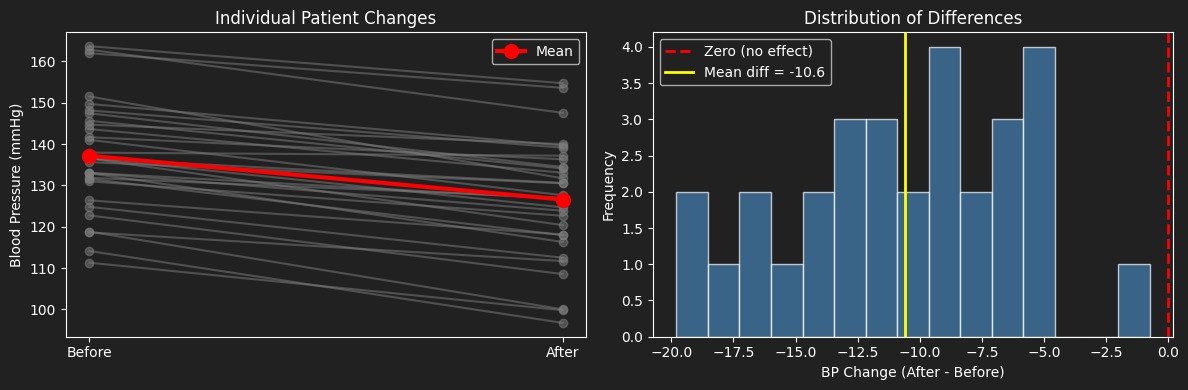

In [57]:
# Visualize paired data
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Before-after plot
ax = axes[0]
for i in range(n_patients):
    ax.plot([0, 1], [bp_before[i], bp_after[i]], 'o-', color='gray', alpha=0.5)
ax.plot([0, 1], [bp_before.mean(), bp_after.mean()], 'o-', color='red', 
        linewidth=3, markersize=10, label='Mean')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Before', 'After'])
ax.set_ylabel('Blood Pressure (mmHg)')
ax.set_title('Individual Patient Changes')
ax.legend()

# Histogram of differences
ax = axes[1]
differences = bp_after - bp_before
ax.hist(differences, bins=15, color='steelblue', edgecolor='white', alpha=0.7)
ax.axvline(0, color='red', linestyle='--', linewidth=2, label='Zero (no effect)')
ax.axvline(differences.mean(), color='yellow', linewidth=2, label=f'Mean diff = {differences.mean():.1f}')
ax.set_xlabel('BP Change (After - Before)')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Differences')
ax.legend()

plt.tight_layout()
plt.show()

### Exercise 3: Paired t-test

**3.1** Generate simulated data: 25 students' test scores before and after a tutoring program. Before scores: N(70, 10), improvement: N(8, 4). Test if the tutoring program significantly improved scores.

**3.2** Using the iris dataset, for the 'versicolor' species, test whether `sepal_length` is significantly different from `petal_length` (treat as paired measurements of the same flower).

In [58]:
# Exercise 3.1: Paired t-test for tutoring program
# YOUR CODE HERE


In [59]:
# Exercise 3.2: Compare sepal_length vs petal_length in versicolor
# YOUR CODE HERE


---
## 4. One-Way ANOVA

**Purpose**: Compare means across 3 or more groups.

**Hypotheses**:
- $H_0$: $\mu_1 = \mu_2 = ... = \mu_k$ (all group means equal)
- $H_1$: At least one mean differs

**F-statistic**:
$$F = \frac{\text{Between-group variance}}{\text{Within-group variance}}$$

**Example**: Do fares differ across passenger classes?

In [60]:
# Example: One-way ANOVA
# Compare fares across passenger classes (1st, 2nd, 3rd)

class1 = titanic[titanic['pclass'] == 1]['fare'].dropna()
class2 = titanic[titanic['pclass'] == 2]['fare'].dropna()
class3 = titanic[titanic['pclass'] == 3]['fare'].dropna()

print("One-Way ANOVA: Fare by Passenger Class")
print("=" * 50)
print(f"1st class: n={len(class1)}, mean=${class1.mean():.2f}")
print(f"2nd class: n={len(class2)}, mean=${class2.mean():.2f}")
print(f"3rd class: n={len(class3)}, mean=${class3.mean():.2f}")
print("-" * 50)

# One-way ANOVA
f_stat, p_value = stats.f_oneway(class1, class2, class3)
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value:.2e}")

if p_value < 0.05:
    print("→ Significant difference in fares between classes")

One-Way ANOVA: Fare by Passenger Class
1st class: n=216, mean=$84.15
2nd class: n=184, mean=$20.66
3rd class: n=491, mean=$13.68
--------------------------------------------------
F-statistic: 242.3442
p-value: 1.03e-84
→ Significant difference in fares between classes


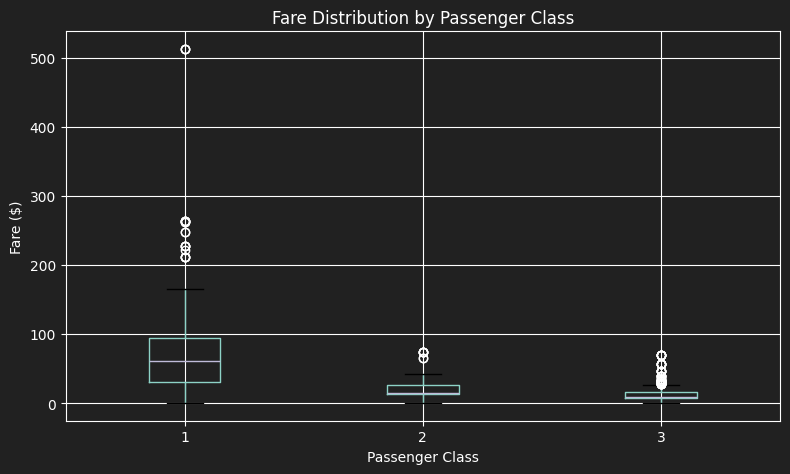

In [61]:
# Visualize
fig, ax = plt.subplots(figsize=(8, 5))
titanic.boxplot(column='fare', by='pclass', ax=ax)
ax.set_xlabel('Passenger Class')
ax.set_ylabel('Fare ($)')
ax.set_title('Fare Distribution by Passenger Class')
plt.suptitle('')
plt.tight_layout()
plt.show()

### Exercise 4: One-Way ANOVA

**4.1** Using iris, test whether `sepal_length` differs across the three species.

**4.2** Using tips, test whether `tip` amounts differ by day of the week.

**4.3** If you find a significant result in 4.1, which assumptions of ANOVA should you check?

In [62]:
# Exercise 4.1: ANOVA for sepal_length across species
# YOUR CODE HERE


In [63]:
# Exercise 4.2: ANOVA for tip by day
# YOUR CODE HERE


In [64]:
# Exercise 4.3: Check ANOVA assumptions (discuss in comments)
# YOUR CODE HERE
# Assumptions to check:
# 1. 
# 2. 
# 3. 


---
## 5. Wilcoxon Signed-Rank Test (Non-Parametric)

**Purpose**: Non-parametric alternative to one-sample or paired t-test.

**Use when**:
- Data are not normally distributed
- Sample size is small
- Data contain outliers
- Data are ordinal

**Example**: Same blood pressure data, but using Wilcoxon test.

In [65]:
# Example: Wilcoxon signed-rank test
# Non-parametric alternative to paired t-test

# Using the same BP data
print("Wilcoxon Signed-Rank Test: BP Before vs After")
print("=" * 50)

# Wilcoxon test on differences
stat, p_value = stats.wilcoxon(bp_before, bp_after)
print(f"Test statistic: {stat:.4f}")
print(f"p-value: {p_value:.6f}")

# Compare with paired t-test
_, p_ttest = stats.ttest_rel(bp_before, bp_after)
print(f"\nCompare with paired t-test p-value: {p_ttest:.6f}")

print("\n→ Both tests reach the same conclusion here")

Wilcoxon Signed-Rank Test: BP Before vs After
Test statistic: 0.0000
p-value: 0.000000

Compare with paired t-test p-value: 0.000000

→ Both tests reach the same conclusion here


In [66]:
# Example: When normality is violated (skewed data)
np.random.seed(123)

# Generate highly skewed data
skewed_before = stats.expon(scale=10).rvs(20)
skewed_after = skewed_before - stats.expon(scale=3).rvs(20)

print("Highly Skewed Data (Exponential)")
print("=" * 50)

# Parametric t-test
_, p_ttest = stats.ttest_rel(skewed_before, skewed_after)
print(f"Paired t-test p-value: {p_ttest:.4f}")

# Non-parametric Wilcoxon
_, p_wilcox = stats.wilcoxon(skewed_before, skewed_after)
print(f"Wilcoxon p-value: {p_wilcox:.4f}")

print("\n→ Results may differ when assumptions are violated")

Highly Skewed Data (Exponential)
Paired t-test p-value: 0.0000
Wilcoxon p-value: 0.0000

→ Results may differ when assumptions are violated


### Exercise 5: Wilcoxon Test

**5.1** For the iris 'setosa' species, use the Wilcoxon signed-rank test to compare `sepal_length` vs `sepal_width` (as paired measurements).

**5.2** Generate skewed data (e.g., from exponential distribution) and compare results of paired t-test vs Wilcoxon test.

In [67]:
# Exercise 5.1: Wilcoxon test for setosa sepal_length vs sepal_width
# YOUR CODE HERE


In [68]:
# Exercise 5.2: Compare t-test and Wilcoxon on skewed data
# YOUR CODE HERE


---
## 6. Mann-Whitney U Test (Non-Parametric)

**Purpose**: Non-parametric alternative to two-sample t-test.

**Tests**: Whether one distribution is stochastically greater than another.

**Advantages**:
- No normality assumption
- Robust to outliers
- Works with ordinal data

**Example**: Compare tips between smokers and non-smokers.

In [69]:
# Example: Mann-Whitney U test
# Compare tips: smokers vs non-smokers

smoker_tips = tips[tips['smoker'] == 'Yes']['tip']
nonsmoker_tips = tips[tips['smoker'] == 'No']['tip']

print("Mann-Whitney U Test: Tips (Smokers vs Non-Smokers)")
print("=" * 50)
print(f"Smokers: n={len(smoker_tips)}, median=${smoker_tips.median():.2f}")
print(f"Non-smokers: n={len(nonsmoker_tips)}, median=${nonsmoker_tips.median():.2f}")
print("-" * 50)

# Mann-Whitney U test
u_stat, p_value = stats.mannwhitneyu(smoker_tips, nonsmoker_tips, alternative='two-sided')
print(f"U-statistic: {u_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Compare with t-test
_, p_ttest = stats.ttest_ind(smoker_tips, nonsmoker_tips)
print(f"\nCompare with t-test p-value: {p_ttest:.4f}")

Mann-Whitney U Test: Tips (Smokers vs Non-Smokers)
Smokers: n=93, median=$3.00
Non-smokers: n=151, median=$2.74
--------------------------------------------------
U-statistic: 7163.0000
p-value: 0.7919

Compare with t-test p-value: 0.9266


### Exercise 6: Mann-Whitney U Test

**6.1** Compare `petal_width` between 'versicolor' and 'virginica' species using Mann-Whitney U test.

**6.2** Compare `total_bill` between male and female customers in the tips dataset using both Mann-Whitney and t-test. Do they agree?

In [70]:
# Exercise 6.1: Mann-Whitney for petal_width (versicolor vs virginica)
# YOUR CODE HERE


In [71]:
# Exercise 6.2: Compare total_bill by sex (Mann-Whitney vs t-test)
# YOUR CODE HERE


---
## 7. Kruskal-Wallis Test (Non-Parametric)

**Purpose**: Non-parametric alternative to one-way ANOVA.

**Tests**: Whether samples originate from the same distribution.

**Example**: Compare tips across days of the week.

In [72]:
# Example: Kruskal-Wallis test
# Compare tips by day

thur_tips = tips[tips['day'] == 'Thur']['tip']
fri_tips = tips[tips['day'] == 'Fri']['tip']
sat_tips = tips[tips['day'] == 'Sat']['tip']
sun_tips = tips[tips['day'] == 'Sun']['tip']

print("Kruskal-Wallis Test: Tips by Day")
print("=" * 50)
for day, t in [('Thur', thur_tips), ('Fri', fri_tips), ('Sat', sat_tips), ('Sun', sun_tips)]:
    print(f"{day}: n={len(t)}, median=${t.median():.2f}")
print("-" * 50)

# Kruskal-Wallis test
h_stat, p_value = stats.kruskal(thur_tips, fri_tips, sat_tips, sun_tips)
print(f"H-statistic: {h_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Compare with ANOVA
_, p_anova = stats.f_oneway(thur_tips, fri_tips, sat_tips, sun_tips)
print(f"\nCompare with ANOVA p-value: {p_anova:.4f}")

Kruskal-Wallis Test: Tips by Day
Thur: n=62, median=$2.30
Fri: n=19, median=$3.00
Sat: n=87, median=$2.75
Sun: n=76, median=$3.15
--------------------------------------------------
H-statistic: 8.5656
p-value: 0.0357

Compare with ANOVA p-value: 0.1736


### Exercise 7: Kruskal-Wallis Test

**7.1** Using iris, compare `sepal_width` across all three species using Kruskal-Wallis test.

**7.2** Compare your result with one-way ANOVA. When would you prefer Kruskal-Wallis over ANOVA?

In [73]:
# Exercise 7.1: Kruskal-Wallis for sepal_width across species
# YOUR CODE HERE


In [74]:
# Exercise 7.2: Compare with ANOVA and discuss
# YOUR CODE HERE


---
## 8. Chi-Square Test for Independence

**Purpose**: Test whether two categorical variables are independent.

**Hypotheses**:
- $H_0$: Variables are independent
- $H_1$: Variables are associated

**Test statistic**:
$$\chi^2 = \sum \frac{(O_{ij} - E_{ij})^2}{E_{ij}}$$

where $O$ = observed frequency, $E$ = expected frequency.

**Example**: Is survival on the Titanic independent of passenger class?

In [75]:
# Example: Chi-square test for independence
# Survival vs Passenger Class

# Create contingency table
contingency = pd.crosstab(titanic['survived'], titanic['pclass'])
print("Contingency Table: Survived vs Class")
print(contingency)
print()

# Chi-square test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency)

print("Chi-Square Test for Independence")
print("=" * 50)
print(f"Chi-square statistic: {chi2:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"p-value: {p_value:.2e}")
print("-" * 50)

if p_value < 0.05:
    print("→ Survival and passenger class are NOT independent")
    print("  (survival rate depends on class)")

print("\nExpected frequencies (under independence):")
print(pd.DataFrame(expected, index=contingency.index, columns=contingency.columns).round(1))

Contingency Table: Survived vs Class
pclass      1   2    3
survived              
0          80  97  372
1         136  87  119

Chi-Square Test for Independence
Chi-square statistic: 102.8890
Degrees of freedom: 2
p-value: 4.55e-23
--------------------------------------------------
→ Survival and passenger class are NOT independent
  (survival rate depends on class)

Expected frequencies (under independence):
pclass        1      2      3
survived                     
0         133.1  113.4  302.5
1          82.9   70.6  188.5


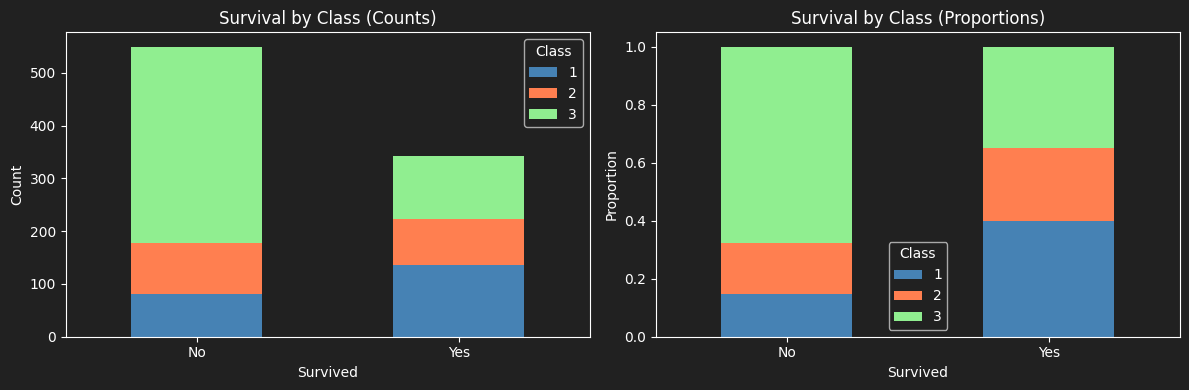

In [76]:
# Visualize with stacked bar chart
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Raw counts
ax = axes[0]
contingency.plot(kind='bar', stacked=True, ax=ax, color=['steelblue', 'coral', 'lightgreen'])
ax.set_xlabel('Survived')
ax.set_ylabel('Count')
ax.set_title('Survival by Class (Counts)')
ax.set_xticklabels(['No', 'Yes'], rotation=0)
ax.legend(title='Class')

# Proportions
ax = axes[1]
contingency_prop = contingency.div(contingency.sum(axis=1), axis=0)
contingency_prop.plot(kind='bar', stacked=True, ax=ax, color=['steelblue', 'coral', 'lightgreen'])
ax.set_xlabel('Survived')
ax.set_ylabel('Proportion')
ax.set_title('Survival by Class (Proportions)')
ax.set_xticklabels(['No', 'Yes'], rotation=0)
ax.legend(title='Class')

plt.tight_layout()
plt.show()

### Exercise 8: Chi-Square Test

**8.1** Test whether survival on the Titanic is independent of sex (`survived` vs `sex`).

**8.2** In the tips dataset, test whether smoking status is independent of the time of day (`smoker` vs `time`).

**8.3** Calculate Cramér's V to measure the strength of association in exercise 8.1. (Hint: $V = \sqrt{\chi^2 / (n \cdot \min(r-1, c-1))}$)

In [77]:
# Exercise 8.1: Chi-square test for survived vs sex
# YOUR CODE HERE


In [78]:
# Exercise 8.2: Chi-square test for smoker vs time
# YOUR CODE HERE


In [79]:
# Exercise 8.3: Calculate Cramér's V for exercise 8.1
# YOUR CODE HERE


---
## 9. Multiple Testing Corrections

**The Problem**: When conducting many hypothesis tests, the probability of at least one false positive increases.

If you perform $m$ independent tests at $\alpha = 0.05$:
- Probability of at least one false positive: $1 - (1-\alpha)^m$
- For 20 tests: $1 - 0.95^{20} \approx 64\%$ chance of a false positive!

**Solutions**:

| Method | Controls | Formula | When to Use |
|--------|----------|---------|-------------|
| **Bonferroni** | FWER | $\alpha_{adj} = \alpha / m$ | Conservative, few tests |
| **Benjamini-Hochberg** | FDR | Rank-based adjustment | Many tests, exploratory |

- **FWER** (Family-Wise Error Rate): Probability of ≥1 false positive
- **FDR** (False Discovery Rate): Expected proportion of false positives among rejections

**Example**: Testing all pairwise correlations in a dataset.

In [80]:
# Example: Multiple Testing Problem
# Testing many hypotheses increases false positive rate

from statsmodels.stats.multitest import multipletests

# Generate data with NO real effects (all null hypotheses true)
np.random.seed(42)
n_tests = 20
n_samples = 30

# All samples from same distribution (no real differences)
p_values = []
for i in range(n_tests):
    group1 = np.random.normal(0, 1, n_samples)
    group2 = np.random.normal(0, 1, n_samples)  # Same distribution!
    _, p = stats.ttest_ind(group1, group2)
    p_values.append(p)

p_values = np.array(p_values)

print("Multiple Testing Problem Demonstration")
print("=" * 60)
print(f"Number of tests: {n_tests}")
print(f"True effects: 0 (all null hypotheses are TRUE)")
print(f"α = 0.05")
print("-" * 60)
print(f"Significant at α=0.05 (uncorrected): {np.sum(p_values < 0.05)}")
print(f"Expected false positives: {n_tests * 0.05:.1f}")
print()
print("This is the multiple testing problem!")

Multiple Testing Problem Demonstration
Number of tests: 20
True effects: 0 (all null hypotheses are TRUE)
α = 0.05
------------------------------------------------------------
Significant at α=0.05 (uncorrected): 1
Expected false positives: 1.0

This is the multiple testing problem!


In [81]:
# Bonferroni Correction
# Divides α by number of tests - very conservative

alpha = 0.05
bonferroni_alpha = alpha / n_tests

print("BONFERRONI CORRECTION")
print("=" * 60)
print(f"Original α: {alpha}")
print(f"Bonferroni α: {bonferroni_alpha:.4f} (α / {n_tests})")
print("-" * 60)

# Manual Bonferroni
sig_bonf_manual = np.sum(p_values < bonferroni_alpha)
print(f"Significant (manual): {sig_bonf_manual}")

# Using scipy's multipletests
reject_bonf, pvals_corrected_bonf, _, _ = multipletests(p_values, alpha=0.05, method='bonferroni')
print(f"Significant (scipy): {np.sum(reject_bonf)}")
print(f"\nCorrected p-values (first 5): {pvals_corrected_bonf[:5].round(4)}")

BONFERRONI CORRECTION
Original α: 0.05
Bonferroni α: 0.0025 (α / 20)
------------------------------------------------------------
Significant (manual): 0
Significant (scipy): 0

Corrected p-values (first 5): [1. 1. 1. 1. 1.]


In [82]:
# Benjamini-Hochberg Correction (FDR)
# Controls false discovery rate - less conservative, more power

print("BENJAMINI-HOCHBERG CORRECTION (FDR)")
print("=" * 60)

# Using scipy's multipletests
reject_bh, pvals_corrected_bh, _, _ = multipletests(p_values, alpha=0.05, method='fdr_bh')
print(f"Significant at FDR=0.05: {np.sum(reject_bh)}")
print(f"\nCorrected p-values (first 5): {pvals_corrected_bh[:5].round(4)}")

# Explain the procedure
print("\nBH Procedure:")
print("1. Rank p-values from smallest to largest")
print("2. Find largest k where p(k) ≤ (k/m) × α")
print("3. Reject all hypotheses with rank ≤ k")

BENJAMINI-HOCHBERG CORRECTION (FDR)
Significant at FDR=0.05: 0

Corrected p-values (first 5): [0.8644 0.9402 0.6209 0.9484 0.7372]

BH Procedure:
1. Rank p-values from smallest to largest
2. Find largest k where p(k) ≤ (k/m) × α
3. Reject all hypotheses with rank ≤ k


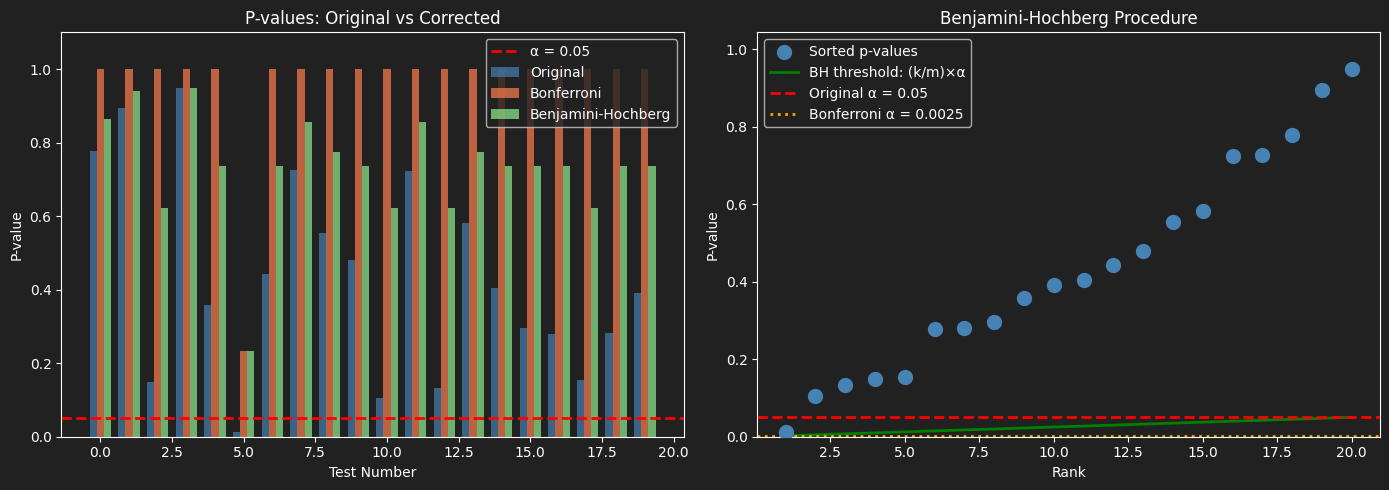

In [83]:
# Visualization: Comparing correction methods
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: P-values comparison
ax = axes[0]
x = np.arange(n_tests)
width = 0.25

ax.bar(x - width, p_values, width, label='Original', color='steelblue', alpha=0.7)
ax.bar(x, pvals_corrected_bonf, width, label='Bonferroni', color='coral', alpha=0.7)
ax.bar(x + width, pvals_corrected_bh, width, label='Benjamini-Hochberg', color='lightgreen', alpha=0.7)
ax.axhline(0.05, color='red', linestyle='--', linewidth=2, label='α = 0.05')
ax.set_xlabel('Test Number')
ax.set_ylabel('P-value')
ax.set_title('P-values: Original vs Corrected')
ax.legend()
ax.set_ylim(0, 1.1)

# Plot 2: Sorted p-values with BH threshold
ax = axes[1]
sorted_idx = np.argsort(p_values)
sorted_pvals = p_values[sorted_idx]
ranks = np.arange(1, n_tests + 1)
bh_threshold = ranks / n_tests * 0.05

ax.scatter(ranks, sorted_pvals, s=100, c='steelblue', label='Sorted p-values', zorder=3)
ax.plot(ranks, bh_threshold, 'g-', linewidth=2, label='BH threshold: (k/m)×α')
ax.axhline(0.05, color='red', linestyle='--', linewidth=2, label='Original α = 0.05')
ax.axhline(bonferroni_alpha, color='orange', linestyle=':', linewidth=2, label=f'Bonferroni α = {bonferroni_alpha:.4f}')
ax.set_xlabel('Rank')
ax.set_ylabel('P-value')
ax.set_title('Benjamini-Hochberg Procedure')
ax.legend()
ax.set_ylim(0, max(sorted_pvals) * 1.1)

plt.tight_layout()
plt.show()

In [84]:
# Example with REAL effects mixed with null effects
np.random.seed(42)
n_total = 20
n_real = 5  # 5 tests have real effects

p_values_mixed = []
true_effects = []

for i in range(n_total):
    group1 = np.random.normal(0, 1, 30)
    if i < n_real:
        # Real effect (mean difference = 1)
        group2 = np.random.normal(1, 1, 30)
        true_effects.append(True)
    else:
        # No effect
        group2 = np.random.normal(0, 1, 30)
        true_effects.append(False)
    _, p = stats.ttest_ind(group1, group2)
    p_values_mixed.append(p)

p_values_mixed = np.array(p_values_mixed)
true_effects = np.array(true_effects)

# Apply corrections
reject_none = p_values_mixed < 0.05
reject_bonf, _, _, _ = multipletests(p_values_mixed, alpha=0.05, method='bonferroni')
reject_bh, _, _, _ = multipletests(p_values_mixed, alpha=0.05, method='fdr_bh')

print("COMPARISON WITH REAL EFFECTS")
print("=" * 60)
print(f"Total tests: {n_total}")
print(f"Tests with real effects: {n_real}")
print(f"Tests with no effect: {n_total - n_real}")
print("-" * 60)
print(f"{'Method':<20} {'True Pos':<12} {'False Pos':<12} {'Power':<10}")
print("-" * 60)

for name, reject in [('No correction', reject_none), 
                     ('Bonferroni', reject_bonf), 
                     ('Benjamini-Hochberg', reject_bh)]:
    tp = np.sum(reject & true_effects)
    fp = np.sum(reject & ~true_effects)
    power = tp / n_real * 100
    print(f"{name:<20} {tp:<12} {fp:<12} {power:<10.1f}%")

print("-" * 60)
print("True Positives = correctly identified real effects")
print("False Positives = incorrectly rejected null hypotheses")
print("Power = True Positives / Real Effects")

COMPARISON WITH REAL EFFECTS
Total tests: 20
Tests with real effects: 5
Tests with no effect: 15
------------------------------------------------------------
Method               True Pos     False Pos    Power     
------------------------------------------------------------
No correction        5            1            100.0     %
Bonferroni           5            0            100.0     %
Benjamini-Hochberg   5            1            100.0     %
------------------------------------------------------------
True Positives = correctly identified real effects
False Positives = incorrectly rejected null hypotheses
Power = True Positives / Real Effects


### Exercise 9: Multiple Testing Corrections

**9.1** In the iris dataset, perform t-tests comparing each species pair for `sepal_length` (3 tests total). Apply both Bonferroni and BH corrections. How do the conclusions change?

**9.2** Generate 100 random t-tests where all null hypotheses are true (no real effects). How many false positives do you get with no correction, Bonferroni, and BH?

**9.3** When would you choose Bonferroni over Benjamini-Hochberg? Write your answer in comments.

In [85]:
# Exercise 9.1: Multiple comparisons for iris sepal_length
# YOUR CODE HERE


In [86]:
# Exercise 9.2: Simulate 100 null tests and compare corrections
# YOUR CODE HERE


In [87]:
# Exercise 9.3: When to use Bonferroni vs BH? (answer in comments)
# YOUR CODE HERE


---
## 10. Choosing the Right Test

| Comparison | Parametric Test | Non-Parametric Alternative |
|------------|-----------------|---------------------------|
| One sample vs. value | One-sample t-test | Wilcoxon signed-rank |
| Two independent samples | Two-sample t-test | Mann-Whitney U |
| Two paired samples | Paired t-test | Wilcoxon signed-rank |
| 3+ independent samples | One-way ANOVA | Kruskal-Wallis |
| Categorical independence | — | Chi-square test |

**Use non-parametric tests when:**
- Data are not normally distributed
- Sample sizes are small (n < 30)
- Data contain outliers
- Data are ordinal (ranked)
- You want more robust results

### Exercise 10: Choosing the Right Test

For each scenario below, identify the appropriate test and justify your choice:

**10.1** Compare exam scores between two classrooms (n=50 each, scores approximately normal).

**10.2** Compare customer satisfaction ratings (1-5 scale) between three stores.

**10.3** Test if a training program improved employee performance (same employees measured before and after, highly skewed data).

**10.4** Investigate whether product preference is related to age group.

In [88]:
# Exercise 10: Write your answers in comments
# 10.1: Test choice and justification

# 10.2: Test choice and justification

# 10.3: Test choice and justification

# 10.4: Test choice and justification


---
## Summary

**Key points:**
1. Always check assumptions before choosing a test
2. Report effect sizes alongside p-values
3. Consider multiple testing corrections when running many tests
4. Non-parametric tests are safer but may have less power
5. Visualize your data before testing

**Essential scipy.stats functions:**
```python
stats.ttest_1samp(a, popmean)           # One-sample t-test
stats.ttest_ind(a, b)                    # Two-sample t-test
stats.ttest_rel(a, b)                    # Paired t-test
stats.f_oneway(*groups)                  # One-way ANOVA
stats.wilcoxon(a, b)                     # Wilcoxon signed-rank
stats.mannwhitneyu(a, b)                 # Mann-Whitney U
stats.kruskal(*groups)                   # Kruskal-Wallis
stats.chi2_contingency(table)            # Chi-square independence
```